In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [3]:
data.shape

(500, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [5]:
data.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [6]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())

In [8]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,107.187755,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,6.051338,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,92.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,103.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,107.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,112.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,120.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [17]:
data.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [22]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,118.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,107.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,104.0,104.0,3.0,3.0,3.5,8.00,1,0.72
3,110.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,103.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [25]:
y = data['Chance of Admit']
x = data.drop(columns = ['Chance of Admit'])

In [26]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [27]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,118.0,118.0,4.0,4.5,4.5,9.65,1
1,107.0,107.0,4.0,4.0,4.5,8.87,1
2,104.0,104.0,3.0,3.0,3.5,8.00,1
3,110.0,110.0,3.0,3.5,2.5,8.67,1
4,103.0,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,108.0,108.0,5.0,4.5,4.0,9.02,1
496,117.0,117.0,5.0,5.0,5.0,9.87,1
497,120.0,120.0,5.0,4.5,5.0,9.56,1
498,103.0,103.0,4.0,4.0,5.0,8.43,0


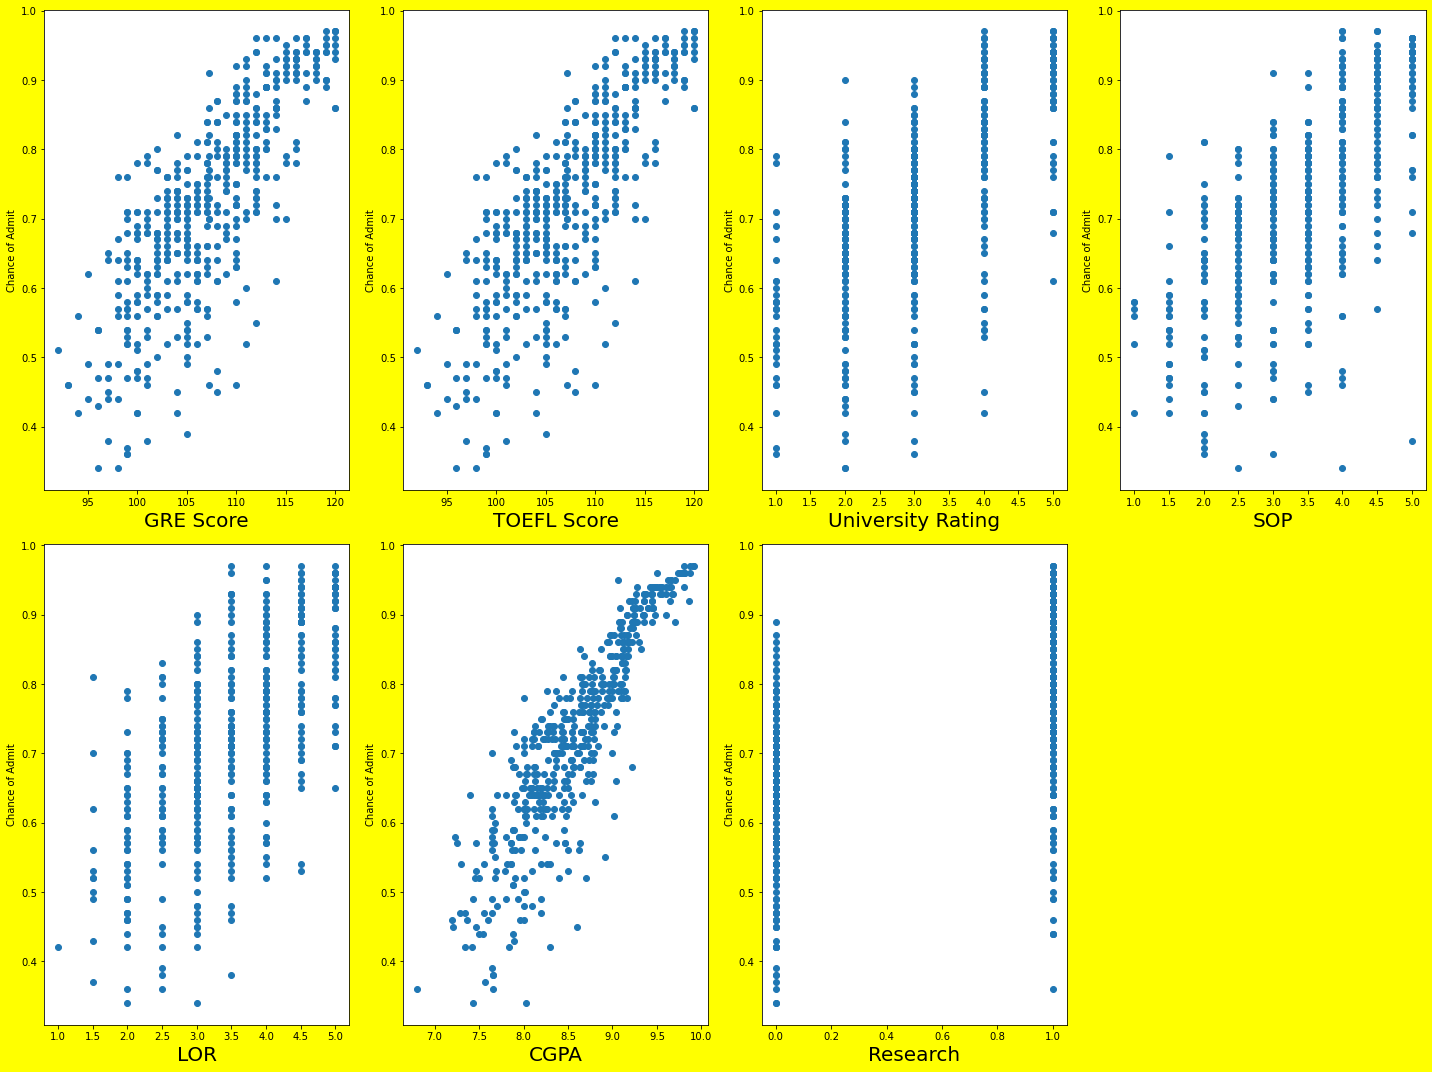

In [28]:
plt.figure(figsize =(20,15),facecolor = 'yellow')
plotnumber = 1
for column in x:
    if plotnumber <= 8:
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('Chance of Admit')
    plotnumber += 1
plt.tight_layout()

In [29]:
from sklearn.preprocessing import StandardScaler

In [31]:
Scaler = StandardScaler()

In [32]:
x_scaled = Scaler.fit_transform(x)
x_scaled

array([[ 1.78854223,  1.78854223,  0.78200955, ...,  1.09894429,
         1.77680627,  0.88640526],
       [-0.03105811, -0.03105811,  0.78200955, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.52731275, -0.52731275, -0.10462259, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 2.11937866,  2.11937866,  1.66864169, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.69273097, -0.69273097,  0.78200955, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.96145116,  0.96145116,  0.78200955, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [33]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=49990)

In [36]:
y_train.head()

478    0.71
192    0.86
61     0.47
155    0.77
243    0.76
Name: Chance of Admit, dtype: float64

In [37]:
from sklearn.linear_model import LinearRegression

In [40]:
regression = LinearRegression()

In [41]:
regression.fit(x_train,y_train)

LinearRegression()

In [42]:
data.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,103.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,113.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [43]:
print('Chance of Admission:',regression.predict(Scaler.transform([[113.0,113.0,4.0,4.5,4.5,9.04,0]])))

Chance of Admission: [0.81741021]


In [45]:
import pickle

In [46]:
filename = 'finalized_mod.pickle'
pickle.dump(regression,open(filename,'wb'))
loaded_model = pickle.load(open(filename,'rb'))

In [47]:
a = loaded_model.predict(Scaler.transform([[103.0,103.0,4.0,4.0,5.0,8.43,0]]))

In [48]:
a

array([0.70400994])

In [49]:
regression.score(x_train,y_train)

0.8283277397331844

In [50]:
regression.score(x_test,y_test)

0.7762057779672717

In [51]:
y_pred = regression.predict(x_test)

In [52]:
y_pred

array([0.49945869, 0.76335674, 0.91790742, 0.62678044, 0.7199466 ,
       0.86053569, 0.72846626, 0.77278492, 0.71704372, 0.81866721,
       0.72517889, 0.81897867, 0.64262545, 0.64660648, 0.90862722,
       0.6927743 , 0.89095044, 0.75135941, 0.68135161, 0.64318866,
       0.78229186, 0.6336333 , 0.78329022, 0.96489124, 0.84845374,
       0.85196157, 0.72590283, 0.61869239, 0.67407252, 0.95449676,
       0.56730469, 0.77158223, 0.54364093, 0.91225476, 0.83366637,
       0.63261604, 0.48044428, 0.70835323, 0.69565391, 0.64349018,
       0.70400994, 0.69875541, 0.86422529, 0.62491601, 0.64097299,
       0.5112378 , 0.6227072 , 0.59172236, 0.70854483, 0.89388288,
       0.76109554, 0.77420703, 0.77831874, 0.59482812, 0.67824   ,
       0.70293724, 0.66533021, 0.82204562, 0.81494144, 0.81990855,
       0.5338489 , 0.90137506, 0.87086446, 0.58689067, 0.99122955,
       0.77599212, 0.70255404, 0.61659848, 0.64455602, 0.86007668,
       0.70530589, 0.69371411, 0.54497551, 0.66168423, 0.65858

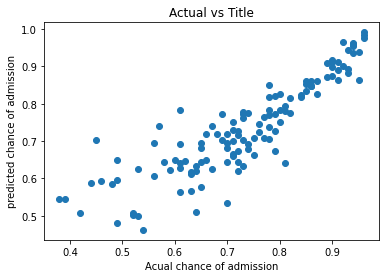

In [53]:
plt.scatter(y_test,y_pred)
plt.xlabel('Acual chance of admission')
plt.ylabel('predicted chance of admission')
plt.title('Actual vs Title')
plt.show()

In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [56]:
y_pred = regression.predict(x_test)

In [57]:
y_pred

array([0.49945869, 0.76335674, 0.91790742, 0.62678044, 0.7199466 ,
       0.86053569, 0.72846626, 0.77278492, 0.71704372, 0.81866721,
       0.72517889, 0.81897867, 0.64262545, 0.64660648, 0.90862722,
       0.6927743 , 0.89095044, 0.75135941, 0.68135161, 0.64318866,
       0.78229186, 0.6336333 , 0.78329022, 0.96489124, 0.84845374,
       0.85196157, 0.72590283, 0.61869239, 0.67407252, 0.95449676,
       0.56730469, 0.77158223, 0.54364093, 0.91225476, 0.83366637,
       0.63261604, 0.48044428, 0.70835323, 0.69565391, 0.64349018,
       0.70400994, 0.69875541, 0.86422529, 0.62491601, 0.64097299,
       0.5112378 , 0.6227072 , 0.59172236, 0.70854483, 0.89388288,
       0.76109554, 0.77420703, 0.77831874, 0.59482812, 0.67824   ,
       0.70293724, 0.66533021, 0.82204562, 0.81494144, 0.81990855,
       0.5338489 , 0.90137506, 0.87086446, 0.58689067, 0.99122955,
       0.77599212, 0.70255404, 0.61659848, 0.64455602, 0.86007668,
       0.70530589, 0.69371411, 0.54497551, 0.66168423, 0.65858

In [58]:
mean_absolute_error(y_test,y_pred)

0.047902378302293824

In [60]:
mean_squared_error(y_test,y_pred)

0.004463016809993817

In [62]:
import numpy as np
np.sqrt(mean_squared_error(y_test,y_pred))

0.06680581419303126

In [63]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [64]:
lasscv = LassoCV(alphas=None,max_iter=100,normalize= True)

In [67]:
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [68]:
alpha = lasscv.alpha_
alpha

1.840931218241864e-05

In [69]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=1.840931218241864e-05)

In [70]:
lasso_reg.score(x_test,y_test)

0.7762029302724707

In [72]:
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [75]:
alpha = ridgecv.alpha_
alpha

0.011

In [77]:
ridge_reg = Ridge(alpha)
ridge_reg.fit(x_train,y_train)
ridge_reg.score(x_test,y_test)

0.7762079063487369